Gradient descent can be compared to descending a mountain or valley. We will learn gradient descent by creating a program to descend from Mt. Fuji, with the elevation data of Mt. Fuji as the objective function we want to minimize .

In [1]:
import numpy as np
csv_path = "mtfuji_data.csv" # Specify the file name (path)
np.set_printoptions(suppress=True) # Set prohibition of scientific notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
fuji[130:140]

array([[  130.      ,    35.352505,   138.756638,  2563.4     ,
        41888.      ],
       [  131.      ,    35.35418 ,   138.753742,  2703.1     ,
        42210.      ],
       [  132.      ,    35.355855,   138.750846,  2825.55    ,
        42532.      ],
       [  133.      ,    35.35753 ,   138.74795 ,  2967.9     ,
        42854.      ],
       [  134.      ,    35.359205,   138.745054,  3087.81    ,
        43177.      ],
       [  135.      ,    35.36088 ,   138.742157,  3266.24    ,
        43499.      ],
       [  136.      ,    35.362555,   138.739261,  3434.59    ,
        43821.      ],
       [  137.      ,    35.36423 ,   138.736364,  3600.08    ,
        44143.      ],
       [  138.      ,    35.365904,   138.733468,  3679.96    ,
        44466.      ],
       [  139.      ,    35.367579,   138.730571,  3664.9     ,
        44788.      ]])

From the left, they are the "point number," "latitude," "longitude," "altitude," and "distance from point 0." The units of altitude and distance are meters.

In [7]:
print(fuji[:,0])

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

In [12]:
print(fuji)

[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 ...
 [  297.          35.631284   138.271368  1973.99     95698.      ]
 [  298.          35.632947   138.268452  1841.36     96020.      ]
 [  299.          35.63461    138.265536  1725.8      96343.      ]]


# [Problem 1] Data visualization
Visualize elevation data using Matplotlib. If you set "the number of the point" on the horizontal axis and "elevation" on the vertical axis, you can draw a cross-sectional view of Mt. Fuji.

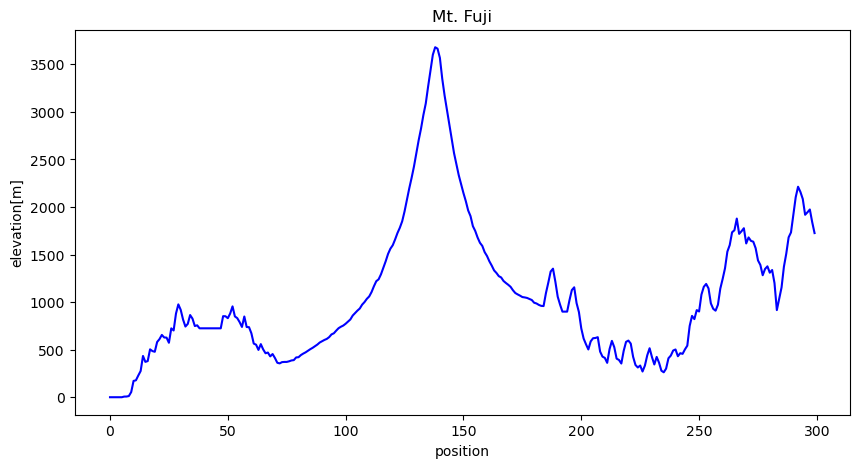

In [38]:
import math
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(fuji[:,0],fuji[:,3], color="blue")
plt.title("Mt. Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.show()

# [Problem 2] Create a function to calculate the gradient at a certain point
In "Two-dimensional array and gradient problem", the gradient at each point was calculated first. However, if you imagine Mt. Fuji in the dark, you can only know the slope of your current location.

Create a function to find the gradient by the relationship between "the number of the current point" and "the number of the next point you are now (number of the current point-1)".

The gradient was calculated by the following formula, but in this data, "elevation" corresponds to y and "the number of that point" corresponds to x.

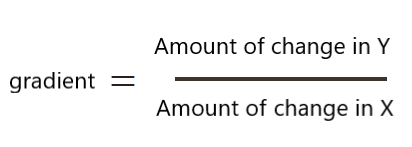

In [41]:
def gradient_slope_specific(fuji, specific_point):
    specific_point_position=fuji[specific_point,:]
    previous_point_position=fuji[specific_point-1,:]
    d_x=previous_point_position[0]-specific_point_position[0]
    d_y=previous_point_position[3]-specific_point_position[3]
    gradient=d_y/d_x
    return gradient
print(gradient_slope_specific(fuji,136)) #Point 

168.35000000000036


In [8]:
def gradient_slope_all(fuji):
    d_x=np.gradient(fuji[:,0])
    d_y=np.gradient(fuji[:,3])
    gradient=d_y/d_x
    return gradient

# [Problem 3] Create a function to calculate the destination point
Create a function that calculates the next destination point based on the gradient information of the current point.

Expressed mathematically, this can be expressed as "destination point = current point - $\alpha$ × gradient of current point."

For the "gradient at the current point", use the return value of the function created in Problem 2. $\alpha$ is a hyperparameter that can take any value greater than 0. In the field of machine learning, this is called the learning rate. The way the gradient descends changes depending on this value. Set it to 0.2 here, for example.


When calculating the above formula, the destination point will have a floating point number, but in order to obtain the gradient information, the point must be expressed as an integer. Therefore, convert by rounding. Also, it is necessary to handle the case where the value is not possible. For example, if the destination point is negative, the gradient cannot be obtained next time because there is no such data.

In [43]:
def destination_point(fuji,current_position,alpha=0.2):
    #destination point = current point - a*gradient of current point.
    destination_point=fuji    
    if alpha>0:
        destination_point=fuji[current_position,0]-alpha*gradient_slope_specific(fuji,current_position)
    else:
        return "Error, alpha not greater than 0"
    return np.round(destination_point).astype(int)
print("The next point to move to based on the information on the slope of the current point is: ",destination_point(fuji,136))

The next point to move to based on the information on the slope of the current point is:  102


# [Problem 4] Create a function to go down the mountain
Create a function that goes down the mountain. Receive the first point and update the point with the function in Problem 3. Record the points for each move in a list, etc., and use this as the return value of the function.

The first "current location" is the 136th location (elevation 3434.59 [m]) near the summit of Mt. Fuji. Let's go down the mountain from here.

<< Implementation Precautions >>

Since we are rounding in question 3, the destination point may be the same as the current point. Since the amount of movement has decreased, please judge that you have gone down the mountain at that point. This does not happen with the actual gradient descent method.

In [44]:
def go_down_a_mountain(position,fuji):
    dest_point = destination_point(fuji,position) # initialize destination point
    dest_point_list = [position]
    for i in range(position):
        current_point = dest_point #equate current point to destination point
        dest_point_list.append(dest_point) # create a list of destination points
        dest_point = destination_point(fuji,current_point)
        
        if current_point == dest_point:
            break
    return dest_point_list
path = go_down_a_mountain(136,fuji)
path

[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]

# [Problem 5] Visualization of the descent process
Visualize the descending process in Problem 4 with a graph using Matplotlib.

<< Visualization example >>

* Display points moved in the cross section as dots
* Make a line graph of altitude and slope for each repetition

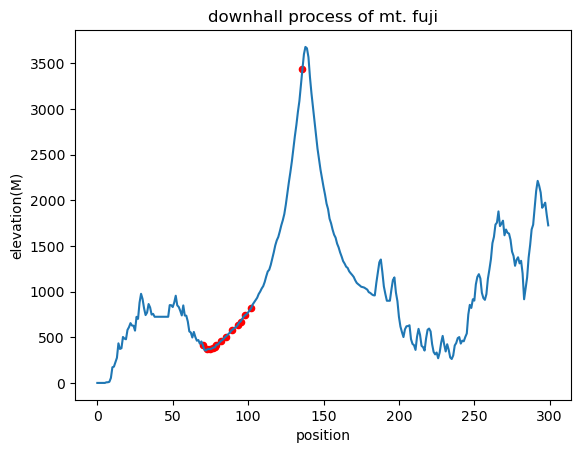

In [45]:
fuji_elevations = fuji[:, 3]
descended_elevations = fuji_elevations[path]
plt.title("downhall process of mt. fuji")
plt.xlabel("position")
plt.ylabel("elevation(M)")
plt.plot(fuji_elevations)
plt.scatter(path, descended_elevations, 20, color = "red")
plt.show()

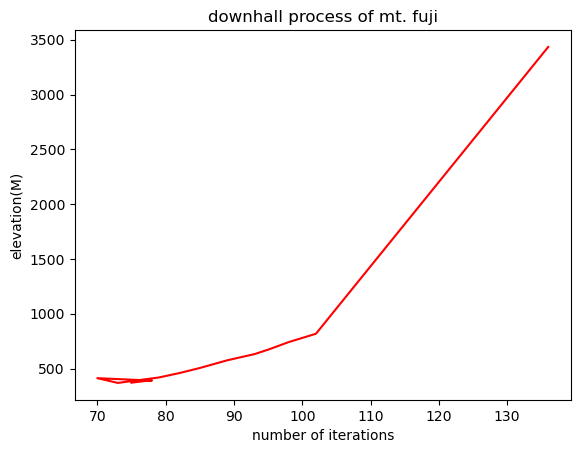

In [51]:
plt.plot(path,fuji[path,3],color='red')
plt.title("downhall process of mt. fuji")
plt.xlabel("number of iterations")
plt.ylabel("elevation(M)")
plt.show()     


# [Problem 6] Change of initial value
In Question 4, we fixed the first "where we are" to 136, but calculate this at all other points. Specifically, it means being able to change the "current location"

In [52]:
go_down_a_mountain(200,fuji)

[200,
 234,
 251,
 215,
 239,
 228,
 206,
 205,
 198,
 231,
 247,
 226,
 239,
 228,
 206,
 205,
 198,
 231,
 247,
 226,
 239,
 228,
 206,
 205,
 198,
 231,
 247,
 226,
 239,
 228,
 206,
 205,
 198,
 231,
 247,
 226,
 239,
 228,
 206,
 205,
 198,
 231,
 247,
 226,
 239,
 228,
 206,
 205,
 198,
 231,
 247,
 226,
 239,
 228,
 206,
 205,
 198,
 231,
 247,
 226,
 239,
 228,
 206,
 205,
 198,
 231,
 247,
 226,
 239,
 228,
 206,
 205,
 198,
 231,
 247,
 226,
 239,
 228,
 206,
 205,
 198,
 231,
 247,
 226,
 239,
 228,
 206,
 205,
 198,
 231,
 247,
 226,
 239,
 228,
 206,
 205,
 198,
 231,
 247,
 226,
 239,
 228,
 206,
 205,
 198,
 231,
 247,
 226,
 239,
 228,
 206,
 205,
 198,
 231,
 247,
 226,
 239,
 228,
 206,
 205,
 198,
 231,
 247,
 226,
 239,
 228,
 206,
 205,
 198,
 231,
 247,
 226,
 239,
 228,
 206,
 205,
 198,
 231,
 247,
 226,
 239,
 228,
 206,
 205,
 198,
 231,
 247,
 226,
 239,
 228,
 206,
 205,
 198,
 231,
 247,
 226,
 239,
 228,
 206,
 205,
 198,
 231,
 247,
 226,
 239,
 228,
 206

# [Problem 7] Visualization of the descent process for each initial value
In Problem 6, we calculated the descending process of all initial values. Therefore, please visualize what kind of descent process will be for some initial values as in Problem 5. It can be confirmed that the initial value affects the result in the gradient descent method.

<< What is the initial value? >>

The value like the first point in this example is called the initial value. Changing this will change the result. For example, 136 and 142 will go down different slopes of Mt. Fuji.



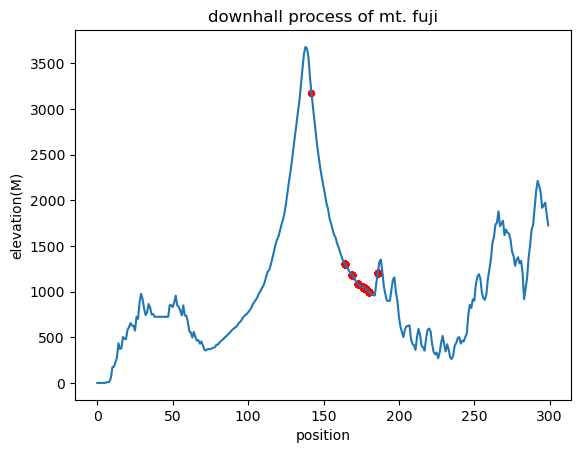

In [55]:
def go_down_a_mountain(position,fuji):
    dest_point = destination_point(fuji,position) # initialize destination point
    dest_point_list = [position]
    for i in range(position):
        current_point = dest_point #equate current point to destination point
        dest_point_list.append(dest_point) # create a list of destination points
        dest_point = destination_point(fuji,current_point)
        
        if current_point == dest_point:
            break
    
    plt.title("downhall process of mt. fuji")
    plt.xlabel("position")
    plt.ylabel("elevation(M)")
    plt.plot(fuji_elevations)
    plt.scatter(dest_point_list, fuji[dest_point_list,3], 20, color = "red")
    plt.show()
go_down_a_mountain(142,fuji)

# [Problem 8] (Advance problem) Hyperparameter changes
Visualize what kind of descent process will occur if you change the hyperparameter $ \ alpha $, as in problem 5. And make sure that the hyperparameters make a big difference in the results.

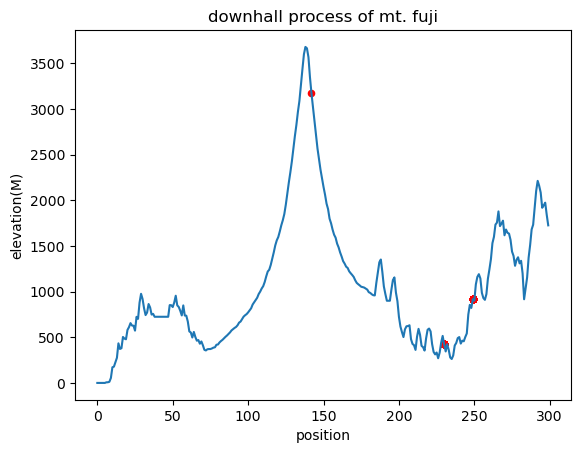

In [56]:
def go_down_a_mountain(position,fuji):
    dest_point = destination_point(fuji,position,0.5) # initialize destination point
    dest_point_list = [position]
    for i in range(position):
        current_point = dest_point #equate current point to destination point
        dest_point_list.append(dest_point) # create a list of destination points
        dest_point = destination_point(fuji,current_point)
        
        if current_point == dest_point:
            break
    
    plt.title("downhall process of mt. fuji")
    plt.xlabel("position")
    plt.ylabel("elevation(M)")
    plt.plot(fuji_elevations)
    plt.scatter(dest_point_list, fuji[dest_point_list,3], 20, color = "red")
    plt.show()
go_down_a_mountain(142,fuji)